In [1]:
import os
import numpy as np
import pandas as pd

## Visualization

In [17]:
import shap
import matplotlib.pyplot as plt

### Beeswarm Plot

In [18]:
explainer1 = shap.Explainer(model, X)
shap_values1 = explainer1(X)

 99%|===================| 2163/2174 [01:26<00:00]        

In [19]:
plt.rc('font',family='Times New Roman', size=25)

In [379]:
plt.rc('font',family='Times New Roman', size=15)
fig0, ax0 = plt.subplots(figsize=(30, 20))
shap.plots.beeswarm(shap_values1,
                    color=plt.get_cmap('GnBu'), 
                    max_display=20, show=False)

### Bar Plot

In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [31]:
shap_values

array([[ 0.03612914, -0.01104631, -0.00756277, ..., -0.00093487,
        -0.00565598,  0.00041998],
       [ 0.03311711, -0.01221473, -0.0070434 , ..., -0.00211242,
         0.02137501,  0.00056574],
       [ 0.03597851,  0.00197732, -0.01269634, ..., -0.00079514,
         0.00292243,  0.0005297 ],
       ...,
       [ 0.04944278,  0.00287687, -0.00249267, ..., -0.00027376,
        -0.00978069,  0.00018463],
       [ 0.04302647,  0.00253968, -0.0027161 , ..., -0.00099094,
        -0.01843589,  0.00031948],
       [ 0.03616782,  0.00162092, -0.0048819 , ..., -0.00087955,
         0.01653811,  0.00056534]])

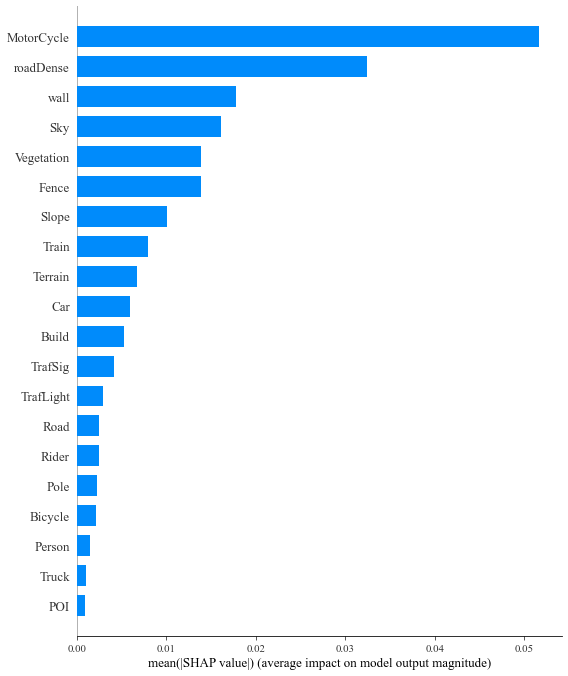

In [22]:
shap.summary_plot(shap_values,X, plot_type='bar')

### Interaction Plot

In [23]:
shap_interaction_values = explainer.shap_interaction_values(X)

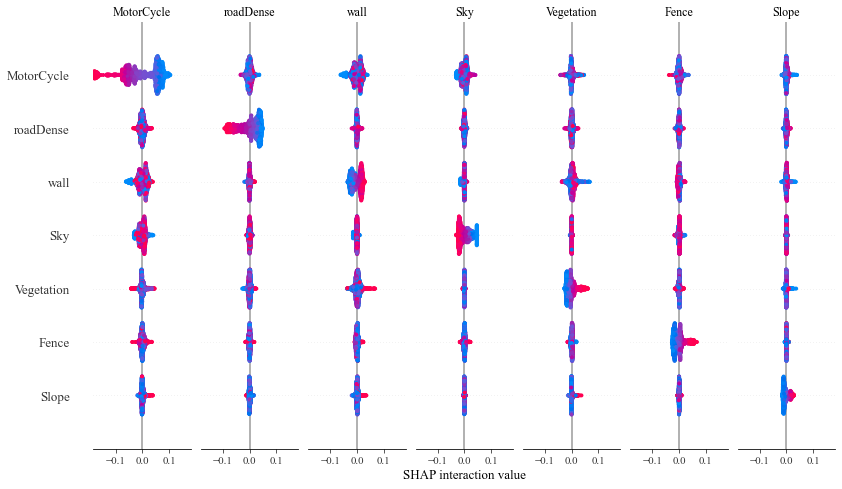

In [24]:
shap.summary_plot(shap_interaction_values, X, 
                  color=plt.get_cmap('GnBu'))

### SHAP Interaction Value Matrix

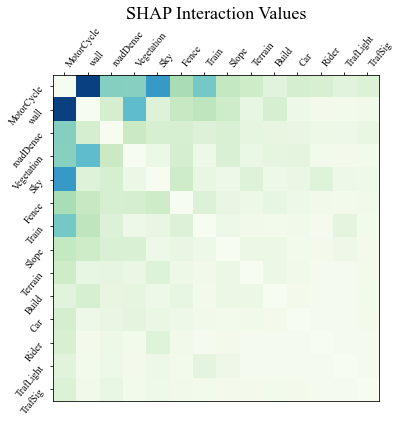

In [25]:
interaction_matrix = np.abs(shap_interaction_values).sum(0)
for i in range(interaction_matrix.shape[0]):
    interaction_matrix[i, i] = 0
inds = np.argsort(-interaction_matrix.sum(0))[:14]    # 返回数组元素排序后的索引
sorted_ia_matrix = interaction_matrix[inds, :][:, inds]    # 对矩阵的数值进行排序
plt.figure(figsize=(6, 6))
plt.imshow(sorted_ia_matrix, cmap='GnBu')
plt.yticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="right",
)
plt.xticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="left",
)
plt.title("SHAP Interaction Values", fontsize=18)
plt.gca().xaxis.tick_top()
plt.show()

### SHAP Mean Effects
- Observe the main effects and the interaction effects separately.
- Exclude interactions with other features to obtain a net effect.

In [100]:
import seaborn as sns
import matplotlib

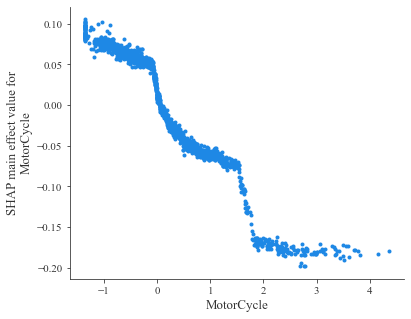

In [54]:
fig1, ax1 = plt.subplots()
# ax1.axhline(0, color="k",linestyle='-.')
# ax1.axvline(-0.1, color="k",linestyle='-.')
shap.dependence_plot(("MotorCycle","MotorCycle"), 
                     shap_interaction_values, 
                     X, 
                     ax=ax1, color=shap_interaction_values,
                     cmap=plt.get_cmap("cool"))

In [61]:
scatter_pointsMC = ax1.get_children()[0].get_offsets()
print(scatter_pointsMC[:,0])

4.364123446265825


In [164]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c="#2295c1", s=5)

    # # now determine nice limits by hand:
    # binwidth = 0.01
    # xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    # lim = (int(xymax/binwidth) + 1) * binwidth

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, rwidth=0.9, facecolor="#2295c1") 
    ax_histy.hist(y, orientation='horizontal', rwidth=0.9, facecolor="#2295c1")

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


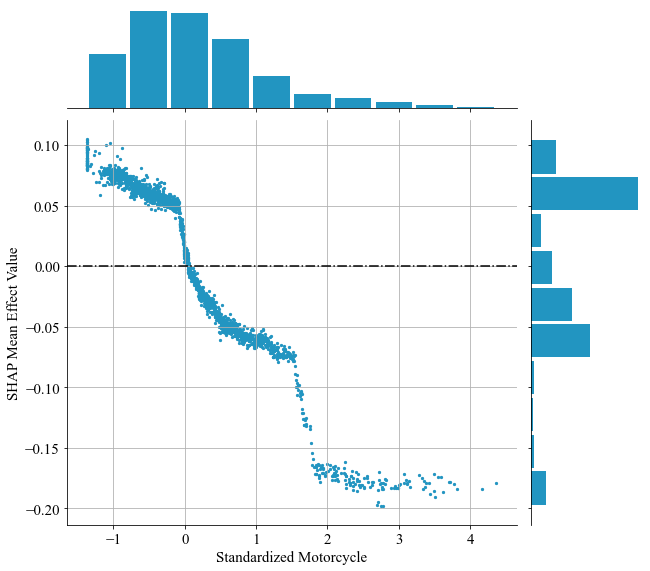

In [173]:
cmap = matplotlib.cm.get_cmap('YlGnBu')
plt.rc('font',family='Times New Roman', size=15)
curvedextend = 0.1
spread = None
extendfrac = curvedextend

# Start with a square Figure.
fig = plt.figure(figsize=(10, 9))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax2 = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax2)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax2)
# Draw the scatter plot and marginals.
ax2.axhline(0, color="k",linestyle='-.')
scatter_hist(scatter_pointsMC[:,0], scatter_pointsMC[:,1], ax2, ax_histx, ax_histy)

ax2.spines['top'].set_visible(False) # 隐藏顶部坐标轴
ax2.spines['right'].set_visible(False) # 隐藏顶部坐标轴
ax2.set_xlabel('Standardized Motorcycle')
ax2.set_ylabel('SHAP Mean Effect Value')

ax_histx.spines['top'].set_visible(False) # 隐藏右侧坐标轴
ax_histx.spines['right'].set_visible(False) # 隐藏右侧坐标轴
# ax_histx.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
ax_histx.spines['left'].set_visible(False) # 隐藏左侧坐标轴

ax_histy.spines['top'].set_visible(False) # 隐藏右侧坐标轴
ax_histy.spines['right'].set_visible(False) # 隐藏右侧坐标轴
ax_histy.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
# ax_histy.spines['left'].set_visible(False) # 隐藏左侧坐标轴

ax_histy.set_xticks([]) # 隐藏x轴刻度
ax_histx.set_yticks([]) # 隐藏y轴刻度

ax2.grid(True)
fig.tight_layout()
plt.savefig(r'./MCSHAP.jpg',dpi=300)

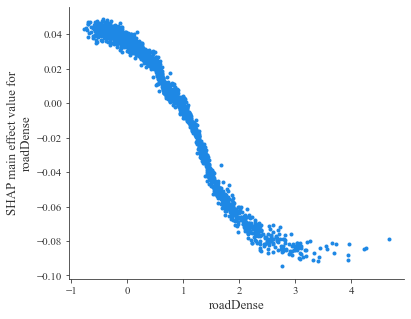

In [174]:
fig2, ax2 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("roadDense","roadDense"),
                     shap_interaction_values, X, 
                     ax=ax2,cmap='GnBu_r')

In [177]:
def dependencePlotCor(x, y, x_label):
    cmap = matplotlib.cm.get_cmap('YlGnBu')
    plt.rc('font',family='Times New Roman', size=15)
    curvedextend = 0.1
    spread = None
    extendfrac = curvedextend
    
    # Start with a square Figure.
    fig = plt.figure(figsize=(10, 9))
    # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
    # the size of the marginal Axes and the main Axes in both directions.
    # Also adjust the subplot parameters for a square plot.
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)

    # Create the Axes.
    axn = fig.add_subplot(gs[1, 0])
    ax_histx = fig.add_subplot(gs[0, 0], sharex=axn)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=axn)
    # Draw the scatter plot and marginals.
    axn.axhline(0, color="k",linestyle='-.')
    scatter_hist(x, y, axn, ax_histx, ax_histy)
    
    axn.spines['top'].set_visible(False) # 隐藏顶部坐标轴
    axn.spines['right'].set_visible(False) # 隐藏顶部坐标轴
    axn.set_xlabel(x_label)
    axn.set_ylabel('SHAP Mean Effect Value')
    
    ax_histx.spines['top'].set_visible(False) # 隐藏右侧坐标轴
    ax_histx.spines['right'].set_visible(False) # 隐藏右侧坐标轴
    # ax_histx.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
    ax_histx.spines['left'].set_visible(False) # 隐藏左侧坐标轴

    ax_histy.spines['top'].set_visible(False) # 隐藏右侧坐标轴
    ax_histy.spines['right'].set_visible(False) # 隐藏右侧坐标轴
    ax_histy.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
    
    ax_histy.set_xticks([]) # 隐藏x轴刻度
    ax_histx.set_yticks([]) # 隐藏y轴刻度
    
    axn.grid(True)
    fig.tight_layout()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


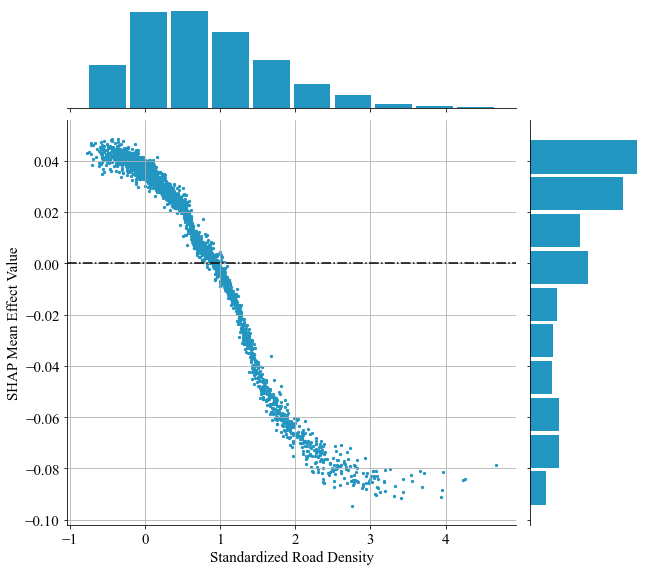

In [179]:
scatter_pointsRD = ax2.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsRD[:,0], scatter_pointsRD[:,1], 'Standardized Road Density')
plt.savefig(r'./RD_SHAP.jpg',dpi=300)

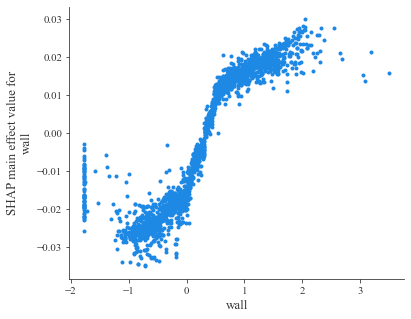

In [180]:
fig3, ax3 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("wall","wall"),
                     shap_interaction_values, X, 
                     ax=ax3,cmap='GnBu_r')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


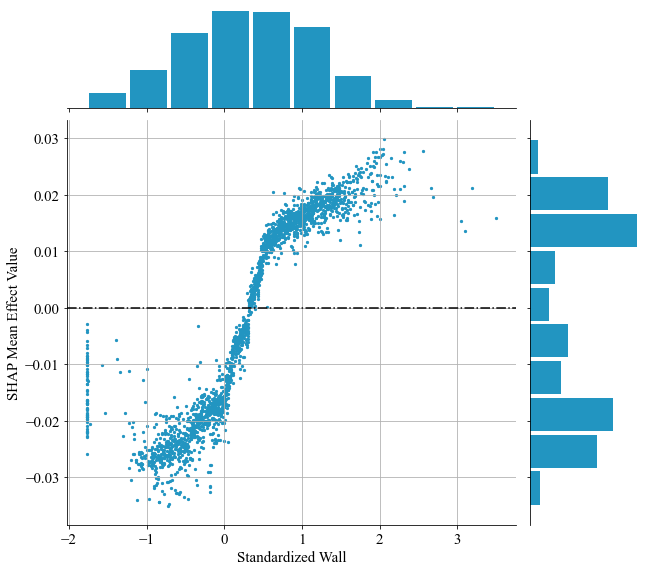

In [181]:
scatter_pointsWall = ax3.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsWall[:,0], scatter_pointsWall[:,1], 'Standardized Wall')
plt.savefig(r'./wall_SHAP.jpg',dpi=300)

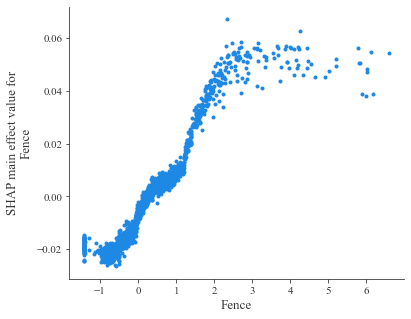

In [182]:
fig4, ax4 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("Fence","Fence"),
                     shap_interaction_values, X, 
                     ax=ax4,cmap='GnBu_r')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


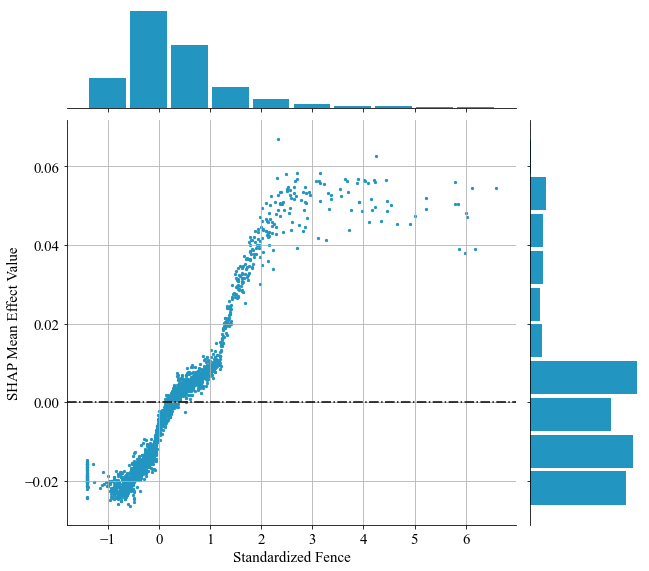

In [183]:
scatter_pointsF = ax4.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsF[:,0], scatter_pointsF[:,1], 'Standardized Fence')
plt.savefig(r'./fence_SHAP.jpg',dpi=300)

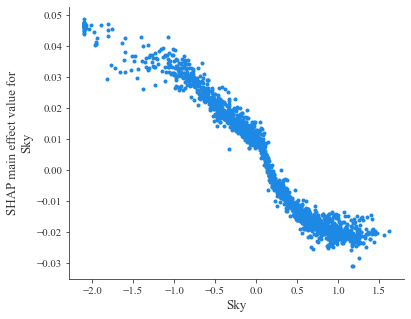

In [184]:
fig5, ax5 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("Sky","Sky"),
                     shap_interaction_values, X, 
                     ax=ax5,cmap='GnBu_r')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


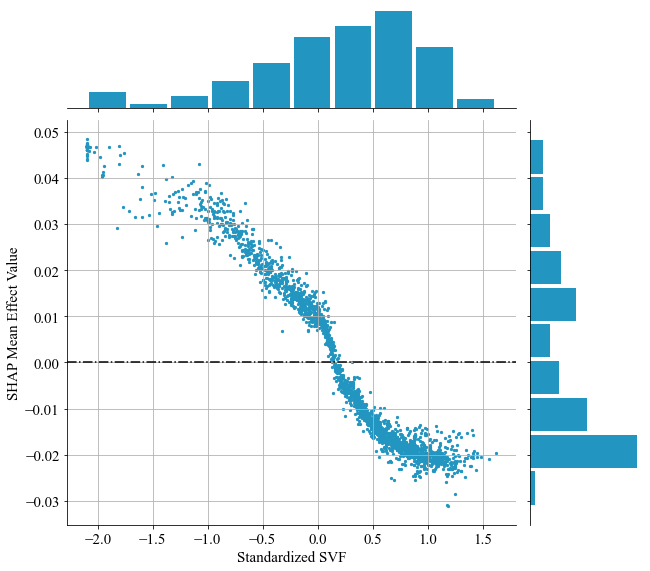

In [185]:
scatter_pointsSky = ax5.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsSky[:,0], scatter_pointsSky[:,1], 'Standardized SVF')
plt.savefig(r'./SKY_SHAP.jpg',dpi=300)

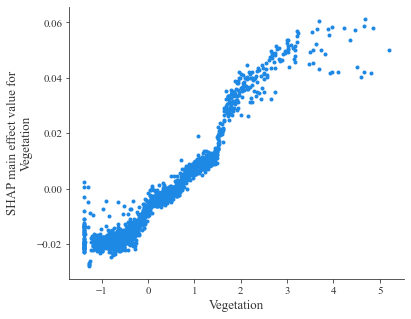

In [186]:
fig6, ax6 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("Vegetation","Vegetation"),
                     shap_interaction_values, X, 
                     ax=ax6,cmap='GnBu_r')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


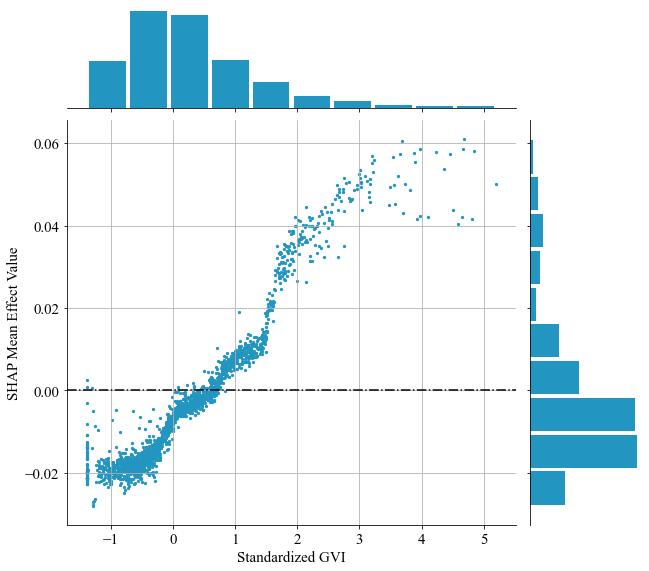

In [187]:
scatter_pointsVeg = ax6.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsVeg[:,0], scatter_pointsVeg[:,1], 'Standardized GVI')
plt.savefig(r'./GVI_SHAP.jpg',dpi=300)

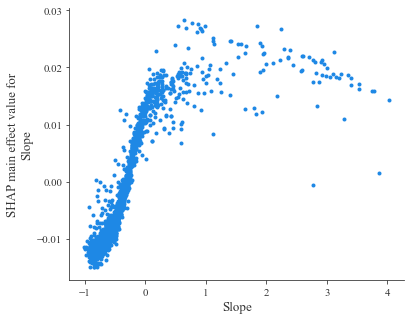

In [188]:
fig7, ax7 = plt.subplots()
# ax2.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("Slope","Slope"),
                     shap_interaction_values, X, 
                     ax=ax7,cmap='GnBu_r')

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


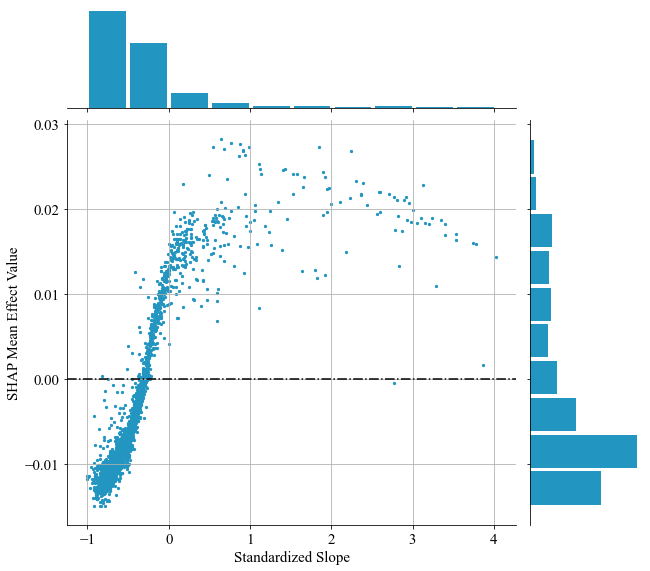

In [189]:
scatter_pointsSlope = ax7.get_children()[0].get_offsets()
dependencePlotCor(scatter_pointsSlope[:,0], scatter_pointsSlope[:,1], 'Standardized Slope')
plt.savefig(r'./Slope_SHAP.jpg',dpi=300)

### SHAP Interaction Value

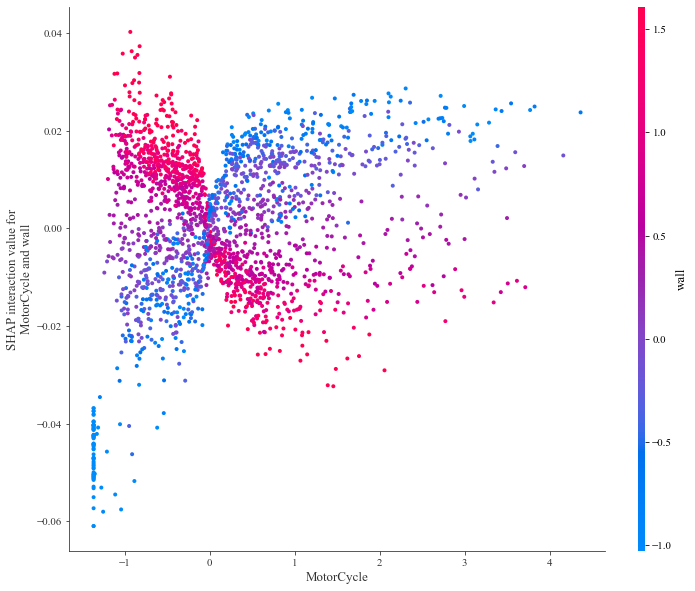

In [190]:
fig8, ax8 = plt.subplots(figsize=(12,10))
# ax3.axvline(0, color="k",linestyle='-.')
# ax3.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("MotorCycle","wall"), 
                     shap_interaction_values, 
                     X,
                     ax=ax8,
                     color=plt.get_cmap('GnBu'))

In [202]:
scatter_MoSky = ax8.get_children()[0].get_offsets()
scatter_MoSkyColor = ax8.get_children()[0].get_array()
print(scatter_MoSky.data)
print('_'*30)
print(scatter_MoSkyColor.data)

[[-6.86645445e-01  7.55151242e-03]
 [ 4.47623109e-01 -5.37236766e-03]
 [ 5.76407109e-01  1.79097488e-02]
 ...
 [ 6.85790992e-01 -1.37036024e-02]
 [ 5.65641953e-01 -3.69446407e-04]
 [ 1.00701990e+00  1.24609966e-02]]
______________________________
[ 0.62590672  0.69470274 -1.01893192 ...  0.95388012  0.38293693
  0.00427705]


In [326]:
def scatter_hist_color(x, y, ax, ax_histx, color, cmap):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c=color, s=5, cmap=cmap)
    ax.hexbin(x, y, gridsize=30, cmap=plt.cm.get_cmap('Blues'),bins='log',
              alpha=0.3)

    # # now determine nice limits by hand:
    # binwidth = 0.01
    # xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    # lim = (int(xymax/binwidth) + 1) * binwidth

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, rwidth=0.9, facecolor="#2295c1") 
    # ax_histy.hist(y, orientation='horizontal', rwidth=0.9, facecolor="#2295c1")

In [364]:
def interactionPlotCor(x, y, color, x_label, color_label):
    cmap = matplotlib.cm.get_cmap('GnBu')
    plt.rc('font',family='Times New Roman', size=15)
    curvedextend = 0.1
    spread = None
    extendfrac = curvedextend
    
    # Start with a square Figure.
    fig = plt.figure(figsize=(10, 9))
    # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
    # the size of the marginal Axes and the main Axes in both directions.
    # Also adjust the subplot parameters for a square plot.
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)

    # Create the Axes.
    axn = fig.add_subplot(gs[1, 0])
    # ax_histx = fig.add_subplot(gs[0, 0], sharex=axn)
    # ax_histx.set_xlim(-1.5,4.5)
    # ax_histy = fig.add_subplot(gs[1, 1], sharey=axn)
    # Draw the scatter plot and marginals.
    axn.axhline(0, color="#2295c1",linestyle='-.')
    axn.axvline(0, color="#2295c1",linestyle='-.')
    
    scatter_hist_color(x, y, axn, ax_histx, color, cmap=cmap)
    axn.scatter(x, y, c=color, s=10, cmap=cmap)
    
    
    axn.spines['top'].set_visible(False) # 隐藏顶部坐标轴
    axn.spines['right'].set_visible(False) # 隐藏顶部坐标轴
    axn.set_xlabel(x_label)
    axn.set_ylabel('SHAP Interaction Value')
    axn.set_ylim(-0.04, 0.04)
    
    # ax_histx.spines['top'].set_visible(False) # 隐藏右侧坐标轴
    # ax_histx.spines['right'].set_visible(False) # 隐藏右侧坐标轴
    # # ax_histx.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
    # ax_histx.spines['left'].set_visible(False) # 隐藏左侧坐标轴

    # ax_histy.spines['top'].set_visible(False) # 隐藏右侧坐标轴
    # ax_histy.spines['right'].set_visible(False) # 隐藏右侧坐标轴
    # ax_histy.spines['bottom'].set_visible(False) # 隐藏底部坐标轴
    
    # ax_histy.set_xticks([]) # 隐藏x轴刻度
    # ax_histx.set_yticks([]) # 隐藏y轴刻度
    
    sm = plt.cm.ScalarMappable(cmap=cmap)
    cbar = fig.colorbar(sm,
                        ax=axn,
                        pad=0.1,
                        label=color_label,
                        extend='both',
                        extendrect=True,
                        extendfrac=0.2)
    cbar.ax.xaxis.set_label_position('bottom')  # 标签在颜色条的底部
    # axn.grid(True)
    fig.tight_layout()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


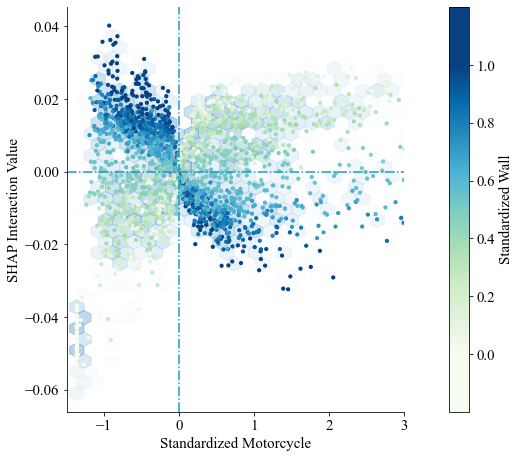

In [341]:
interactionPlotCor(scatter_MoSky.data[:,0], scatter_MoSky.data[:,1], scatter_MoSkyColor,'Standardized Motorcycle',color_label='Standardized Wall')
plt.savefig(r'./Mo_WallSHAP.jpg',dpi=300)

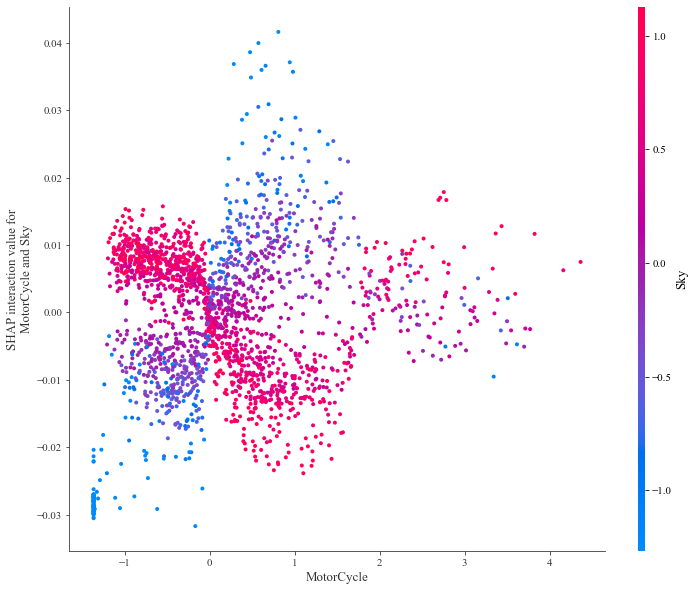

In [342]:
fig9, ax9 = plt.subplots(figsize=(12,10))
# ax3.axvline(0, color="k",linestyle='-.')
# ax3.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("MotorCycle","Sky"), 
                     shap_interaction_values, 
                     X,
                     ax=ax9,
                     color=plt.get_cmap('GnBu'))

In [343]:
scatter_MoSky = ax9.get_children()[0].get_offsets()
scatter_MoSkyColor = ax9.get_children()[0].get_array()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


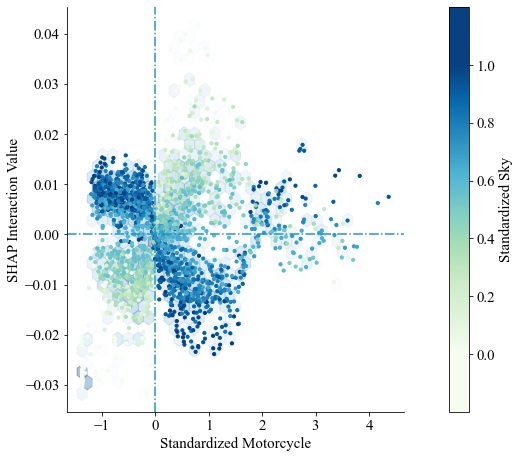

In [356]:
interactionPlotCor(scatter_MoSky.data[:,0], scatter_MoSky.data[:,1], scatter_MoSkyColor,'Standardized Motorcycle',color_label='Standardized Sky')
plt.savefig(r'./Mo_SkySHAP.jpg',dpi=300)

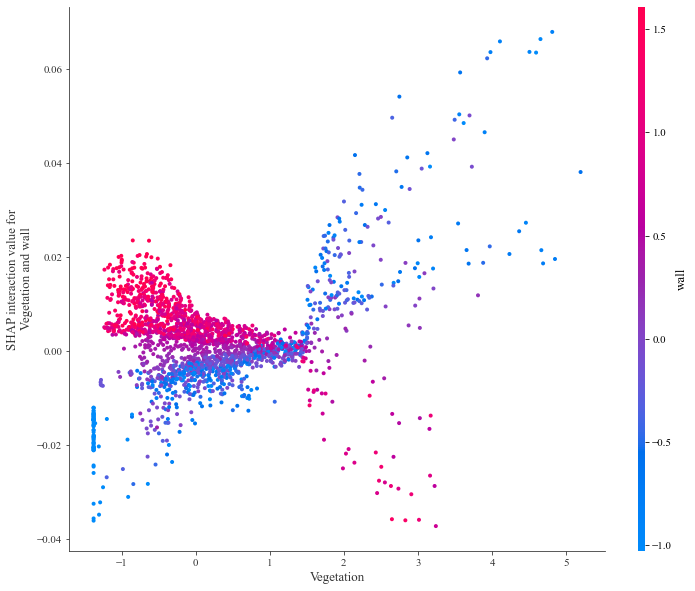

In [360]:
fig10, ax10 = plt.subplots(figsize=(12,10))
# ax10.axvline(0, color="k",linestyle='-.')
# ax10.axhline(0, color="k",linestyle='-.')
shap.dependence_plot(("Vegetation","wall"), 
                     shap_interaction_values, 
                     X,
                     ax=ax10,
                     color=plt.get_cmap('GnBu'))

In [362]:
scatter_MoSky = ax10.get_children()[0].get_offsets()
scatter_MoSkyColor = ax10.get_children()[0].get_array()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


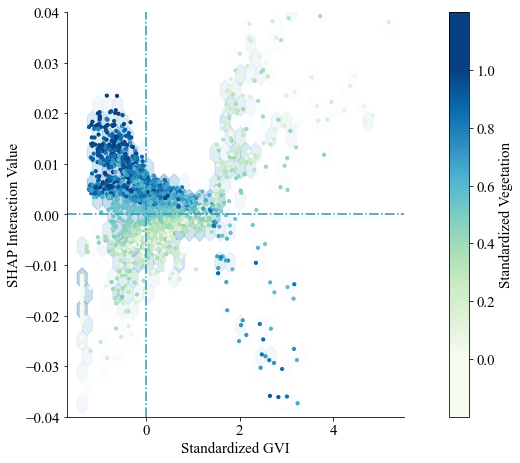

In [365]:
interactionPlotCor(scatter_MoSky.data[:,0], scatter_MoSky.data[:,1], scatter_MoSkyColor,'Standardized GVI',color_label='Standardized Vegetation')
plt.savefig(r'./GVI_WallSHAP.jpg',dpi=300)